In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [7]:
def data_cleansing(file):
    df = pd.read_csv(file)

    df[['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct']] = df[[
        'carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct']].round(0)

    df[['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']] = df[[
        'carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']].round(0).astype(int)

    df = df.drop('arr_diverted', axis=1)

    df['total_delayed_flights'] = df['arr_del15']+df['carrier_ct'] + \
        df['weather_ct']+df['nas_ct']+df['late_aircraft_ct']
    df.to_csv(file, index=False)


In [8]:
def Airline_Wise(file):
    dict_airlines = {}
    total_arriving_flights = {}
    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count = 0
        for row in csvreader:
            #  skipping the 1st line
            if not count:
                count += 1
                continue

            if row[2] not in dict_airlines:
                dict_airlines[row[2]] = int(row[17])
            else:
                dict_airlines[row[2]] += int(row[17])

            if row[2] not in total_arriving_flights:
                total_arriving_flights[row[2]] = int(row[5])
            else:
                total_arriving_flights[row[2]] += int(row[5])

    # print(dict_airlines.values())
    # print(total_arriving_flights.values())

    # total delayed flights / total arriving flights
    airlinewise_delay = np.array(list(dict_airlines.values())) / \
        np.array(list(total_arriving_flights.values()))*100
    color = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
    plt.bar(dict_airlines.keys(), airlinewise_delay, color=color)
    plt.xticks(rotation=90)
    plt.xlabel("Airlines", fontweight='bold')
    plt.ylabel("% delayed flights", fontweight='bold')
    plt.title('Airline-Wise Delay')
    plt.show()


In [13]:
def Airport_Wise(file):
    airports_delay = {}
    airports_arriving = {}

    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count = 0
        for row in csvreader:
            #  skipping the 1st line
            if not count:
                count += 1
                continue

            if row[3] not in airports_delay:
                airports_delay[row[3]] = int(row[17])
            else:
                airports_delay[row[3]] += int(row[17])

            if row[3] not in airports_arriving:
                airports_arriving[row[3]] = int(row[5])
            else:
                airports_arriving[row[3]] += int(row[5])

    airportwise_delay = np.array(list(airports_delay.values())) / \
        np.array(list(airports_arriving.values()))*100
    color = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

    # print(airports_arriving)
    airports = airports_arriving.values()
    tempo = list(airports_arriving.keys())
    major_airports_arr = sorted(
        enumerate(airports), key=lambda x: x[1], reverse=True)[:10]

    index1 = []
    temp1 = []
    for i, value in major_airports_arr:
        index1.append(i)
        temp1.append(value)
    major_airports_arr = temp1

    # print(index1)
    # print(major_airports_arr)

    major_airports = [tempo[i] for i in index1]
    # print(major_airports)
    major_airport_propo = [airportwise_delay[i] for i in index1]
    # print(major_airport_propo)
    plt.bar(major_airports, major_airport_propo, color=color)
    plt.xticks(rotation=90)
    plt.xlabel("Major Airports", fontweight='bold')
    plt.ylabel("% delayed flights", fontweight='bold')
    plt.title('Airport-Wise Delay')
    plt.show()


In [10]:
data_cleansing('delays_2018.csv')
data_cleansing('delays_2019.csv')

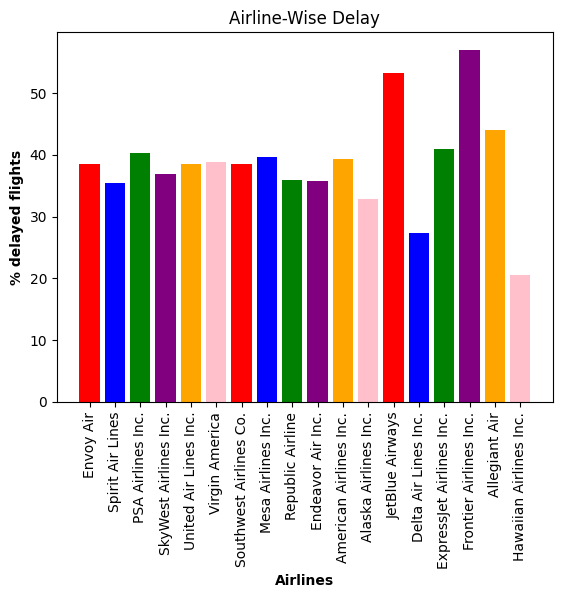

In [11]:
Airline_Wise('delays_2018.csv')

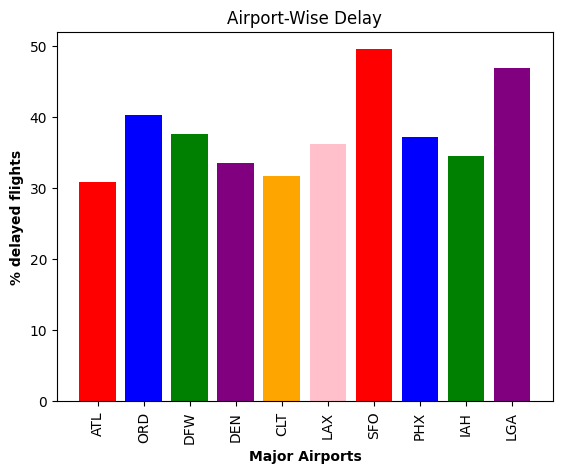

In [14]:
Airport_Wise('delays_2018.csv')

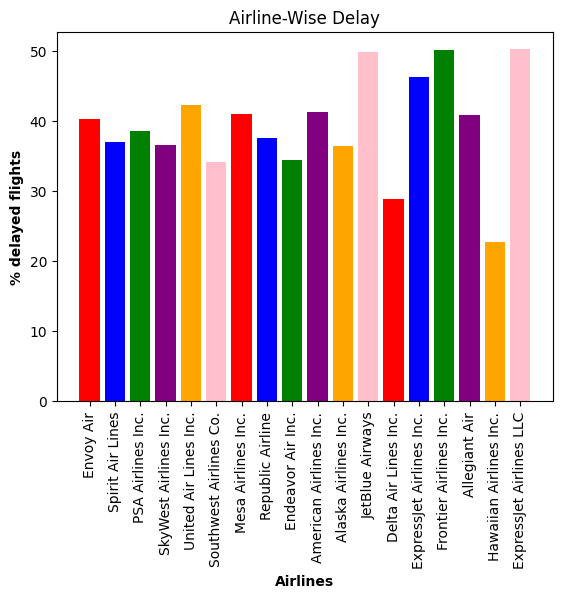

In [15]:
Airline_Wise('delays_2019.csv')

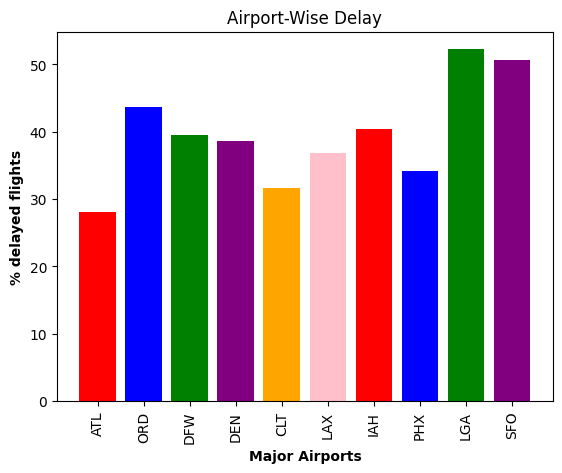

In [16]:
Airport_Wise('delays_2019.csv')